First 5 rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter

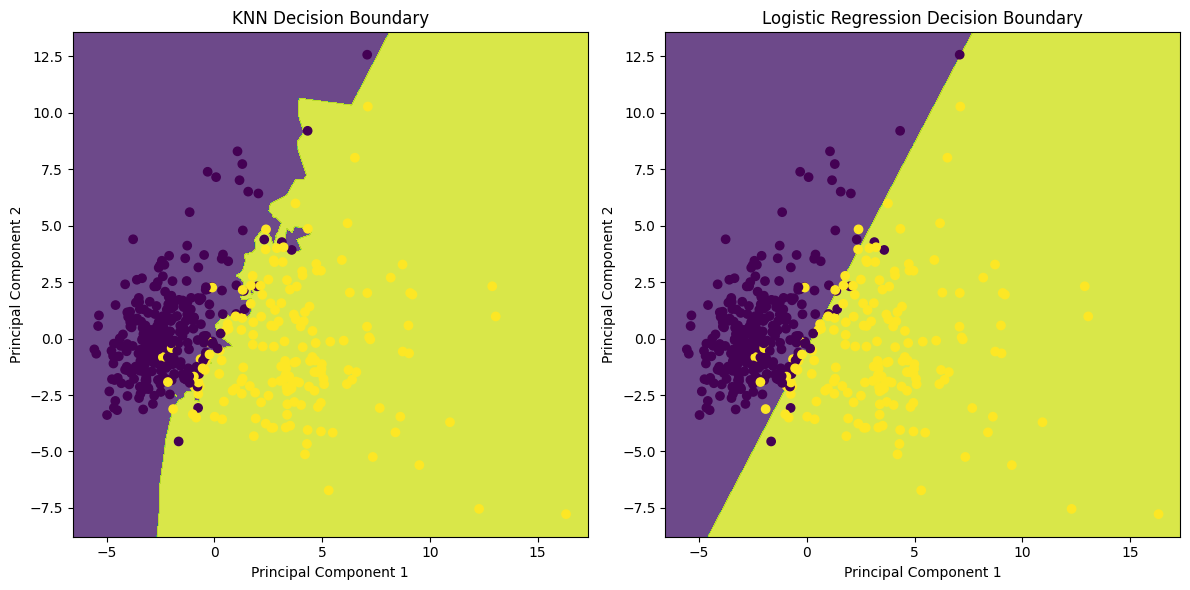


Conclusion:
The Logistic Regression model performs better in this task.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Task 1: Data Exploration and Preprocessing
# Load the dataset
file_path = '/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv'
data = pd.read_csv(file_path)

# Display the first 5 rows to explore the dataset
print("First 5 rows of the dataset:\n", data.head())

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Drop any irrelevant columns (e.g., id or unnamed columns)
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)

# Convert categorical target 'diagnosis' into numerical form (M = 1 for malignant, B = 0 for benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Check the distribution of the target variable
print("\nDistribution of the target variable (diagnosis):\n", data['diagnosis'].value_counts())

# Separate features and target variable
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis']  # Target

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Task 2: Model Development - K-Nearest Neighbors (KNN) Classifier

# Initialize KNN with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict using the KNN model
y_pred_knn = knn.predict(X_test)

# Task 2: Logistic Regression Model

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=10000)

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predict using the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)

# Task 3: Model Evaluation

# Function to evaluate and print model metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Model Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Evaluate KNN model
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Evaluate Logistic Regression model
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Task 4: Visualizations

# PCA for decision boundary visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Plot decision boundary for KNN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
knn.fit(X_train_pca, y_train_pca)
xx, yy = np.meshgrid(np.arange(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 0.01),
                     np.arange(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 0.01))
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca)
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot decision boundary for Logistic Regression
plt.subplot(1, 2, 2)
log_reg.fit(X_train_pca, y_train_pca)
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Report Conclusion
print("\nConclusion:")
if accuracy_score(y_test, y_pred_knn) > accuracy_score(y_test, y_pred_log_reg):
    print("The K-Nearest Neighbors (KNN) model performs better in this task.")
else:
    print("The Logistic Regression model performs better in this task.")
